In [8]:
import numpy as np
import matplotlib.pyplot as plt
import MNISTtools
import NeuralNetwork 


In [9]:

def OneHot(y):
    # --------------------------------
    # todo (Digit Label to One-Hot Key)
    # --------------------------------
    one_hot = np.zeros((y.shape[0], 10))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

def Accuracy(y,y_):
    # --------------------------------
    # todo (Compute Accuracy)
    # --------------------------------
    y_true = np.argmax(y,1)
    y_pred = np.argmax(y_,1)
    temp = np.equal(y_true, y_pred).astype(np.float32)
    return np.sum(temp) / float(y_true.shape[0])

# 1a

Download  train-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\train-images-idx3-ubyte.gz ...
pass
Download  train-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\train-labels-idx1-ubyte.gz ...
pass
Download  t10k-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\t10k-images-idx3-ubyte.gz ...
pass
Download  t10k-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\t10k-labels-idx1-ubyte.gz ...
pass
Iteration   100, Loss=0.2027, Accurate=0.781
Iteration   200, Loss=0.1716, Accurate=0.828
Iteration   300, Loss=0.1379, Accurate=0.859
Iteration   400, Loss=0.1115, Accurate=0.859
Iteration   500, Loss=0.1036, Accurate=0.797
Iteration   600, Loss=0.0791, Accurate=0.781
Iteration   700, Loss=0.0827, Accurate=0.812
Iteration   800, Loss=0.0586, Accurate=0.844
Iteration   900, Loss=0.0513, Accurate=0.969
Iteration  1000, Loss=0.0653, Accurate=0.875
Iteration  1100, Loss=0.0373, Accurate=0.844
Iteration  1200, Loss=0.0392, Accurate=0.922
Iteration  1300, Loss=0.0356, Accurate=0.938
Iteration  1400

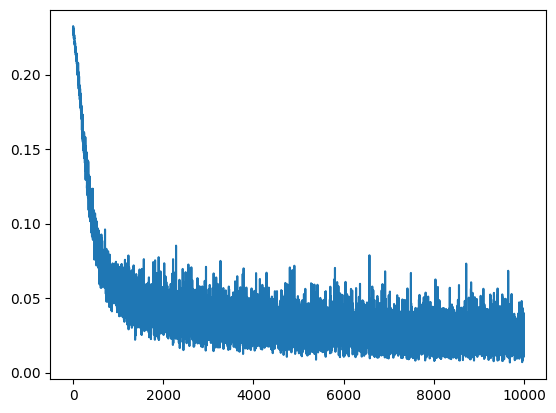

In [10]:
if __name__ == "__main__":
    # Dataset
    MNISTtools.downloadMNIST(path='MNIST_data', unzip=True)
    x_train, y_train = MNISTtools.loadMNIST(dataset="training", path="MNIST_data")
    x_test, y_test = MNISTtools.loadMNIST(dataset="testing", path="MNIST_data")

    # Show Data and Label
    # print(x_train[0])
    # print(y_train[0])
    # plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
    # plt.show()

    # --------------------------------
    # todo (Data Processing)
    # --------------------------------

    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0
    # print(y_train[:10])

    y_train = OneHot(y_train)
    y_test = OneHot(y_test)
    # print(y_train_onehot[:10])

    # --------------------------------
    # todo (Create NN Model)
    # --------------------------------
    nn = NeuralNetwork.NN1(input_size = 28*28, hidden_size = 256, output_size = 10, activation = "softmax")
    # nn = NeuralNetwork.NN2(input_size = 28*28, hidden_size1 = 204, hidden_size2=202, output_size = 10, activation = "softmax")

    # Training the Model
    loss_rec = []
    batch_size = 64
    for i in range(10000):
        # --------------------------------
        # todo (Sample Data Batch)
        # --------------------------------
        indices = np.random.choice(x_train.shape[0], batch_size)
        x_batch = x_train[indices]
        y_batch = y_train[indices]
        # if i == 1:
        #     print(x_batch.shape)

        # --------------------------------
        # todo (Forward & Backward & Update)
        # --------------------------------
        nn.feed({
            "x":x_batch, 
            "y":y_batch
        })
        nn.forward()
        nn.backward()
        nn.update(0.01)

        # nn.backward(y_batch)

        # --------------------------------
        # todo (Loss)
        # --------------------------------
        loss = nn.computeLoss()
        loss_rec.append(loss)
        
        # --------------------------------
        # todo (Evaluation)
        # --------------------------------
        indices = np.random.choice(x_test.shape[0], batch_size)
        x_test_batch = x_test[indices]
        y_test_batch = y_test[indices]

        nn.feed({
            "x":x_test_batch
        })
        y_test_out = nn.forward()
        acc = Accuracy(y_test_batch, y_test_out)
        
        if (i + 1) % 100 == 0:
            print(f"Iteration {i + 1:5d}, Loss={loss:.4f}, Accurate={acc:.3f}")
    
    

    
    nn.feed({"x":x_test})
    y_test_out = nn.forward()
    total_acc = Accuracy(y_test, y_test_out)
    print("Total Accuracy:", total_acc)

    plt.plot(loss_rec)
    plt.show()

# 1b

Download  train-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\train-images-idx3-ubyte.gz ...
pass
Download  train-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\train-labels-idx1-ubyte.gz ...
pass
Download  t10k-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\t10k-images-idx3-ubyte.gz ...
pass
Download  t10k-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\t10k-labels-idx1-ubyte.gz ...
pass
Iteration  1000, Loss=0.0706, Accurate=0.812
Iteration  2000, Loss=0.0393, Accurate=0.906
Iteration  3000, Loss=0.0308, Accurate=0.859
Iteration  4000, Loss=0.0235, Accurate=0.969
Iteration  5000, Loss=0.0208, Accurate=0.922
Iteration  6000, Loss=0.0426, Accurate=0.938
Iteration  7000, Loss=0.0228, Accurate=0.906
Iteration  8000, Loss=0.0150, Accurate=0.938
Iteration  9000, Loss=0.0219, Accurate=0.969
Iteration 10000, Loss=0.0097, Accurate=0.938
Total Accuracy: 0.9423


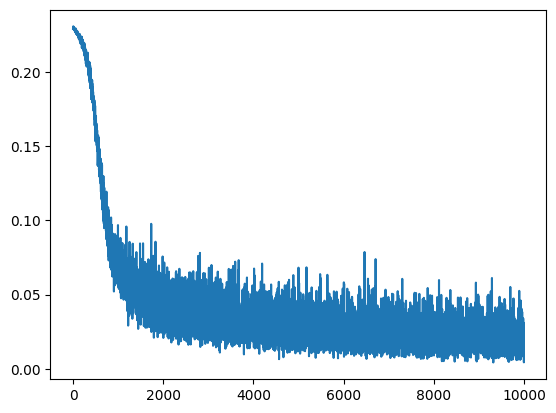

In [11]:
if __name__ == "__main__":
    # Dataset
    MNISTtools.downloadMNIST(path='MNIST_data', unzip=True)
    x_train, y_train = MNISTtools.loadMNIST(dataset="training", path="MNIST_data")
    x_test, y_test = MNISTtools.loadMNIST(dataset="testing", path="MNIST_data")

    # Show Data and Label
    # print(x_train[0])
    # print(y_train[0])
    # plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
    # plt.show()

    # --------------------------------
    # todo (Data Processing)
    # --------------------------------

    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0
    # print(y_train[:10])

    y_train = OneHot(y_train)
    y_test = OneHot(y_test)
    # print(y_train_onehot[:10])

    # --------------------------------
    # todo (Create NN Model)
    # --------------------------------
    # nn = NeuralNetwork.NN1(input_size = 28*28, hidden_size = 256, output_size = 10, activation = "softmax")
    nn = NeuralNetwork.NN2(input_size = 28*28, hidden_size1 = 204, hidden_size2=202, output_size = 10, activation = "softmax")

    # Training the Model
    loss_rec = []
    batch_size = 64
    for i in range(10000):
        # --------------------------------
        # todo (Sample Data Batch)
        # --------------------------------
        indices = np.random.choice(x_train.shape[0], batch_size)
        x_batch = x_train[indices]
        y_batch = y_train[indices]
        # if i == 1:
        #     print(x_batch.shape)

        # --------------------------------
        # todo (Forward & Backward & Update)
        # --------------------------------
        nn.feed({
            "x":x_batch, 
            "y":y_batch
        })
        nn.forward()
        nn.backward()
        nn.update(0.01)

        # nn.backward(y_batch)

        # --------------------------------
        # todo (Loss)
        # --------------------------------
        loss = nn.computeLoss()
        loss_rec.append(loss)
        
        # --------------------------------
        # todo (Evaluation)
        # --------------------------------
        indices = np.random.choice(x_test.shape[0], batch_size)
        x_test_batch = x_test[indices]
        y_test_batch = y_test[indices]

        nn.feed({
            "x":x_test_batch
        })
        y_test_out = nn.forward()
        acc = Accuracy(y_test_batch, y_test_out)
        
        if (i + 1) % 1000 == 0:
            print(f"Iteration {i + 1:5d}, Loss={loss:.4f}, Accurate={acc:.3f}")
    
    

    
    nn.feed({"x":x_test})
    y_test_out = nn.forward()
    total_acc = Accuracy(y_test, y_test_out)
    print("Total Accuracy:", total_acc)

    plt.plot(loss_rec)
    plt.show()

# 2a

Download  train-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\train-images-idx3-ubyte.gz ...
pass
Download  train-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\train-labels-idx1-ubyte.gz ...
pass
Download  t10k-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\t10k-images-idx3-ubyte.gz ...
pass
Download  t10k-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\t10k-labels-idx1-ubyte.gz ...
pass
Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration 10000


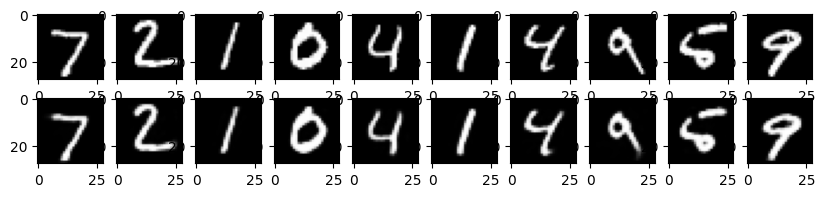

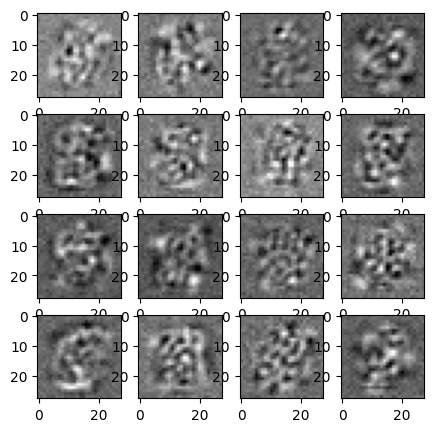

In [12]:
if __name__ == "__main__":
    # Dataset
    MNISTtools.downloadMNIST(path='MNIST_data', unzip=True)
    x_train, y_train = MNISTtools.loadMNIST(dataset="training", path="MNIST_data")
    x_test, y_test = MNISTtools.loadMNIST(dataset="testing", path="MNIST_data")

    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0

    y_train = OneHot(y_train)
    y_test = OneHot(y_test)

    ae = NeuralNetwork.NN1(input_size = 28*28, hidden_size = 128 , output_size = 28*28, activation = "sigmoid")
    
    # Training the Model
    loss_rec = []
    batch_size = 64
    for i in range(10000):
        indices = np.random.choice(x_train.shape[0], batch_size)
        x_batch = x_train[indices]
        ae.feed({
            "x":x_batch,
            "y":x_batch
        })
        ae.forward()
        ae.backward()
        ae.update(0.01)
        if (i + 1) % 1000 == 0:
            print(f"Iteration {i + 1:5d}")
        
    # Visualize the reconstruction results
    ae.feed({"x":x_test[:10]})
    reconstructed = ae.forward()
    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(x_test[i].reshape((28, 28)), cmap='gray')
        axes[1, i].imshow(reconstructed[i].reshape((28, 28)), cmap='gray')
    plt.show()
    
    # Visualize the first 16 filters
    filters = ae.W1.T.reshape((-1, 28, 28))
    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i in range(16):
        axes[i//4, i%4].imshow(filters[i], cmap='gray')
    plt.show()

# 2b

Download  train-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\train-images-idx3-ubyte.gz ...
pass
Download  train-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\train-labels-idx1-ubyte.gz ...
pass
Download  t10k-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\t10k-images-idx3-ubyte.gz ...
pass
Download  t10k-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\t10k-labels-idx1-ubyte.gz ...
pass
Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration 10000


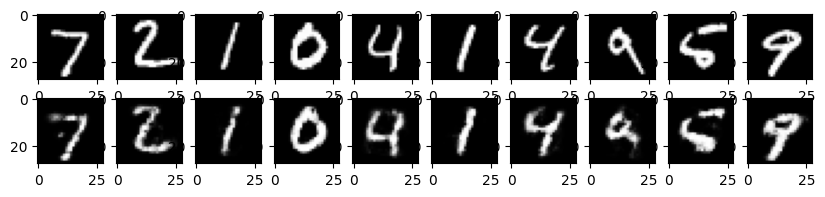

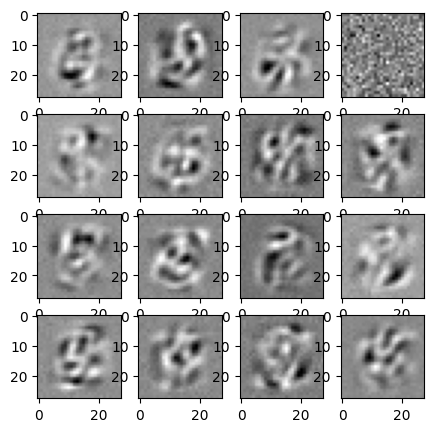

In [13]:
if __name__ == "__main__":
    # Dataset
    MNISTtools.downloadMNIST(path='MNIST_data', unzip=True)
    x_train, y_train = MNISTtools.loadMNIST(dataset="training", path="MNIST_data")
    x_test, y_test = MNISTtools.loadMNIST(dataset="testing", path="MNIST_data")

    x_train = x_train.astype(np.float32) / 255.0
    x_test = x_test.astype(np.float32) / 255.0

    y_train = OneHot(y_train)
    y_test = OneHot(y_test)

    ae = NeuralNetwork.Autoencoder2(input_size = 28*28, hidden_size = 128 , output_size = 28*28, activation = "sigmoid")
    
    # Training the Model
    loss_rec = []
    batch_size = 64
    for i in range(10000):
        indices = np.random.choice(x_train.shape[0], batch_size)
        x_batch = x_train[indices]
        ae.feed({
            "x":x_batch,
            "y":x_batch
        })
        ae.forward()
        ae.backward()
        ae.update(0.01)
        if (i + 1) % 1000 == 0:
            print(f"Iteration {i + 1:5d}")
        
    # Visualize the reconstruction results
    ae.feed({"x":x_test[:10]})
    reconstructed = ae.forward()
    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(x_test[i].reshape((28, 28)), cmap='gray')
        axes[1, i].imshow(reconstructed[i].reshape((28, 28)), cmap='gray')
    plt.show()
    
    # Visualize the first 16 filters
    filters = ae.W1.T.reshape((-1, 28, 28))
    fig, axes = plt.subplots(4, 4, figsize=(5, 5))
    for i in range(16):
        axes[i//4, i%4].imshow(filters[i], cmap='gray')
    plt.show()